In [ ]:
import pandas as pd
import numpy as np
import re
import string
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

#Compréhension des données

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


df = pd.read_csv('ResumeCV.csv')
print("Fichier CSV chargé avec succès.")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print(df.info())

Fichier CSV chargé avec succès.
| Category            | Resume                                                                                                                                                                                                         |
|:--------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| AI Researcher       | Seeking a AI Researcher position. Bringing proficiency in Algorithm Development, Machine Learning, PyTorch, Statistical Modeling, and TensorFlow. Eager to contribute to a dynamic team.                       |
| QA Engineer         | Results-oriented QA Engineer proficient in API Testing (Postman), Performance Testing (JMeter), SQL, and Regression Testing. Proven track record in delivering high-quality solutions. Experienced with Agile. |
| Technical Writer    | Seeking a Te

In [ ]:
print(df['Category'].unique())

['AI Researcher' 'QA Engineer' 'Technical Writer' 'Project Manager'
 'Solutions Architect' 'UI/UX Designer' 'Scrum Master' 'Game Developer'
 'Data Scientist' 'Frontend Developer' 'Product Manager'
 'Mobile Developer (iOS)' 'Database Administrator' 'Full Stack Developer'
 'Mobile App Developer (iOS/Android)' 'Cloud Engineer' 'Backend Developer'
 'Marketing Technologist' 'Data Engineer' 'Machine Learning Engineer'
 'Network Engineer' 'DevOps Engineer' 'Blockchain Developer'
 'Mobile Developer (Android)' 'Systems Administrator'
 'Cybersecurity Analyst' 'Business Analyst' 'Python Developer']


In [ ]:
categories = sorted(df['Category'].unique())
print(f"Nombre total de catégories : {len(categories)}")

Nombre total de catégories : 28


In [ ]:
category_counts = df['Category'].value_counts()

print("Distribution des catégories :")
print(category_counts)


Distribution des catégories :
Category
Backend Developer                     59
Frontend Developer                    54
Cloud Engineer                        54
Data Scientist                        53
Mobile App Developer (iOS/Android)    47
Full Stack Developer                  43
Machine Learning Engineer             41
Python Developer                      40
Solutions Architect                   36
Technical Writer                      33
Game Developer                        33
QA Engineer                           32
Network Engineer                      32
UI/UX Designer                        31
Business Analyst                      31
Database Administrator                31
AI Researcher                         30
Mobile Developer (iOS)                30
Scrum Master                          30
Product Manager                       30
Mobile Developer (Android)            30
Marketing Technologist                30
Project Manager                       29
Data Engineer     

#Préparation et Prétraitement des données

In [ ]:
#  Nettoyage du Texte
def clean_text(text):
      text = str(text).lower() # mettre en minuscule
      text = text.translate(str.maketrans('', '', string.punctuation)) # Enlever ponctuation
      text = re.sub(r'\d+', '', text) # Enlever les nombres
      text = ' '.join(text.split()) # Enlever espaces superflus
      return text

In [ ]:
# Appliquer la fonction de nettoyage
df['Cleaned_Resume'] = df['Resume'].apply(clean_text)
print("Nettoyage terminé.")
print("Exemple après nettoyage :")
print(df[['Resume', 'Cleaned_Resume']].head(1).to_markdown(index=False, numalign="left", stralign="left"))

Nettoyage terminé.
Exemple après nettoyage :
| Resume                                                                                                                                                                                   | Cleaned_Resume                                                                                                                                                                    |
|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Seeking a AI Researcher position. Bringing proficiency in Algorithm Development, Machine Learning, PyTorch, Statistical Modeling, and TensorFlow. Eager to contribute to a dynamic team. | seeking a ai researcher posi

In [ ]:
print(df[['Resume', 'Cleaned_Resume']].head(1).to_markdown(index=False))

| Resume                                                                                                                                                                                   | Cleaned_Resume                                                                                                                                                                    |
|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Seeking a AI Researcher position. Bringing proficiency in Algorithm Development, Machine Learning, PyTorch, Statistical Modeling, and TensorFlow. Eager to contribute to a dynamic team. | seeking a ai researcher position bringing proficiency in algorithm develo

In [ ]:
# Encodage des Étiquettes
print("\nEncodage des étiquettes...")
label_encoder = LabelEncoder()
df['Category_Encoded'] = label_encoder.fit_transform(df['Category'])
class_names = label_encoder.classes_
print("Encodage terminé.")
print("Classes trouvées :", class_names)
print("Mappage Catégorie -> Code :")
for category, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"- {category}: {code}")
print(df[['Category', 'Category_Encoded']].head().to_markdown(index=False, numalign="left", stralign="left"))


Encodage des étiquettes...
Encodage terminé.
Classes trouvées : ['AI Researcher' 'Backend Developer' 'Blockchain Developer'
 'Business Analyst' 'Cloud Engineer' 'Cybersecurity Analyst'
 'Data Engineer' 'Data Scientist' 'Database Administrator'
 'DevOps Engineer' 'Frontend Developer' 'Full Stack Developer'
 'Game Developer' 'Machine Learning Engineer' 'Marketing Technologist'
 'Mobile App Developer (iOS/Android)' 'Mobile Developer (Android)'
 'Mobile Developer (iOS)' 'Network Engineer' 'Product Manager'
 'Project Manager' 'Python Developer' 'QA Engineer' 'Scrum Master'
 'Solutions Architect' 'Systems Administrator' 'Technical Writer'
 'UI/UX Designer']
Mappage Catégorie -> Code :
- AI Researcher: 0
- Backend Developer: 1
- Blockchain Developer: 2
- Business Analyst: 3
- Cloud Engineer: 4
- Cybersecurity Analyst: 5
- Data Engineer: 6
- Data Scientist: 7
- Database Administrator: 8
- DevOps Engineer: 9
- Frontend Developer: 10
- Full Stack Developer: 11
- Game Developer: 12
- Machine Lea

In [ ]:
# Définir X et y pour les étapes suivantes
X = df['Cleaned_Resume']
y = df['Category_Encoded']

In [ ]:
# --- Vectorisation TF-IDF ---
tfidf_vectorizer = TfidfVectorizer(
      max_features=5000,
      stop_words='english'
)

# Adapter et transformer les données textuelles
X_tfidf = tfidf_vectorizer.fit_transform(X)
print("Vectorisation TF-IDF terminée.")
print(f"Dimensions de la matrice TF-IDF : {X_tfidf.shape}")

Vectorisation TF-IDF terminée.
Dimensions de la matrice TF-IDF : (1000, 1276)


In [ ]:
#Division Train/Test
print("\nDivision des données en ensembles d'entraînement et de test...")
X_train, X_test, y_train, y_test = train_test_split(
  X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)
print("Division terminée.")
print(f"Taille Train: X={X_train.shape}, y={y_train.shape}")
print(f"Taille Test:  X={X_test.shape}, y={y_test.shape}")


Division des données en ensembles d'entraînement et de test...
Division terminée.
Taille Train: X=(800, 1276), y=(800,)
Taille Test:  X=(200, 1276), y=(200,)


#Modélisation



1.   Régression Logistique







In [ ]:
# Entraînement du Modèle
print("\nEntraînement du modèle de Régression Logistique...")
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train, y_train)
print("Entraînement terminé.")


Entraînement du modèle de Régression Logistique...
Entraînement terminé.





2.  Multinomial Naive Bayes





In [ ]:
# Entraînement du Modèle
print("\nEntraînement du modèle Multinomial Naive Bayes...")
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
print("Model training complete.")

Model training complete.


#Évaluation

1.   Régression Logistique


In [ ]:
# Évaluation
y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=class_names, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy Régression Logistique : {accuracy:.4f}\n")
print("Rapport de Classification :\n", report)

Accuracy Régression Logistique : 0.9400

Rapport de Classification :
                                     precision    recall  f1-score   support

                     AI Researcher       0.86      1.00      0.92         6
                 Backend Developer       1.00      0.92      0.96        12
              Blockchain Developer       1.00      1.00      1.00         6
                  Business Analyst       0.80      0.67      0.73         6
                    Cloud Engineer       0.85      1.00      0.92        11
             Cybersecurity Analyst       1.00      1.00      1.00         5
                     Data Engineer       1.00      1.00      1.00         6
                    Data Scientist       0.91      0.91      0.91        11
            Database Administrator       0.86      1.00      0.92         6
                   DevOps Engineer       1.00      1.00      1.00         5
                Frontend Developer       1.00      1.00      1.00        11
              Ful


Affichage de la Matrice de Confusion...


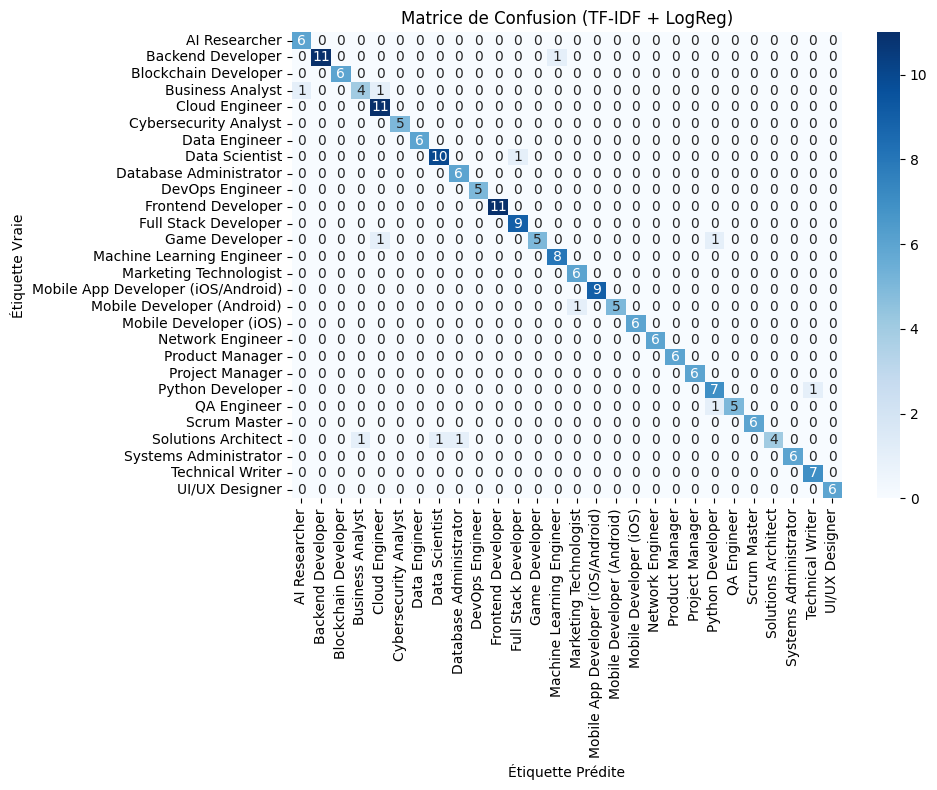

In [ ]:
# Visualisation de la Matrice de Confusion
print("\nAffichage de la Matrice de Confusion...")
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion (TF-IDF + LogReg)')
plt.xlabel('Étiquette Prédite')
plt.ylabel('Étiquette Vraie')
plt.tight_layout()
plt.show()

2.  Multinomial Naive Bayes


In [ ]:
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb, target_names=class_names, zero_division=0)
print(f"\n--- Results using MultinomialNB ---")
print(f"Accuracy MultinomialNB: {accuracy_nb:.4f}\n")
print("Classification Report:\n", report_nb)


--- Results using MultinomialNB ---
Accuracy MultinomialNB: 0.9300

Classification Report:
                                     precision    recall  f1-score   support

                     AI Researcher       0.86      1.00      0.92         6
                 Backend Developer       0.85      0.92      0.88        12
              Blockchain Developer       1.00      1.00      1.00         6
                  Business Analyst       0.80      0.67      0.73         6
                    Cloud Engineer       0.85      1.00      0.92        11
             Cybersecurity Analyst       1.00      1.00      1.00         5
                     Data Engineer       1.00      1.00      1.00         6
                    Data Scientist       0.91      0.91      0.91        11
            Database Administrator       0.86      1.00      0.92         6
                   DevOps Engineer       1.00      1.00      1.00         5
                Frontend Developer       1.00      1.00      1.00     

#Sauvegarde et chargement du modèle

In [ ]:
# Sauvegarde
model_filename = 'logistic_regression_model.joblib'
vectorizer_filename = 'tfidf_vectorizer.joblib'
label_encoder_filename = 'label_encoder.joblib'

print(f"\nSauvegarde du modèle dans {model_filename}...")
joblib.dump(logreg_model, model_filename)
print("Modèle sauvegardé.")

print(f"Sauvegarde du vectoriseur TF-IDF dans {vectorizer_filename}...")
joblib.dump(tfidf_vectorizer, vectorizer_filename)
print("Vectoriseur sauvegardé.")

print(f"Sauvegarde de l'encodeur d'étiquettes dans {label_encoder_filename}...")
joblib.dump(label_encoder, label_encoder_filename)
print("Encodeur d'étiquettes sauvegardé.")


Sauvegarde du modèle dans logistic_regression_model.joblib...
Modèle sauvegardé.
Sauvegarde du vectoriseur TF-IDF dans tfidf_vectorizer.joblib...
Vectoriseur sauvegardé.
Sauvegarde de l'encodeur d'étiquettes dans label_encoder.joblib...
Encodeur d'étiquettes sauvegardé.


In [ ]:
# Chargement
loaded_model = joblib.load('logistic_regression_model.joblib')
loaded_vectorizer = joblib.load('tfidf_vectorizer.joblib')
loaded_label_encoder = joblib.load('label_encoder.joblib')
print("Modèle, vectoriseur et encodeur chargés avec succès.")
    # Vérifier le type pour confirmer
print("Type du modèle chargé:", type(loaded_model))
print("Type du vectoriseur chargé:", type(loaded_vectorizer))
print("Type de l'encodeur chargé:", type(loaded_label_encoder))
    # Récupérer les noms de classe depuis l'encodeur chargé
loaded_class_names = loaded_label_encoder.classes_
print("Classes chargées depuis l'encodeur :", loaded_class_names)

Modèle, vectoriseur et encodeur chargés avec succès.
Type du modèle chargé: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Type du vectoriseur chargé: <class 'sklearn.feature_extraction.text.TfidfVectorizer'>
Type de l'encodeur chargé: <class 'sklearn.preprocessing._label.LabelEncoder'>
Classes chargées depuis l'encodeur : ['AI Researcher' 'Backend Developer' 'Blockchain Developer'
 'Business Analyst' 'Cloud Engineer' 'Cybersecurity Analyst'
 'Data Engineer' 'Data Scientist' 'Database Administrator'
 'DevOps Engineer' 'Frontend Developer' 'Full Stack Developer'
 'Game Developer' 'Machine Learning Engineer' 'Marketing Technologist'
 'Mobile App Developer (iOS/Android)' 'Mobile Developer (Android)'
 'Mobile Developer (iOS)' 'Network Engineer' 'Product Manager'
 'Project Manager' 'Python Developer' 'QA Engineer' 'Scrum Master'
 'Solutions Architect' 'Systems Administrator' 'Technical Writer'
 'UI/UX Designer']


#Test

In [ ]:
import joblib
import re
import string
import os
import numpy as np
from google.colab import files
import io

In [ ]:
# Définition de la fonction de nettoyage
def clean_text(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = ' '.join(text.split())
    return text

# Upload interactif du fichier CV
print("Veuillez choisir le fichier CV à uploader :")
uploaded = files.upload()


    # Prendre le nom du premier fichier uploadé
file_name = next(iter(uploaded))
print(f"\nFichier '{file_name}' uploadé avec succès.")

    # Lire le contenu du fichier uploadé
cv_text_content = uploaded[file_name].decode('utf-8', errors='ignore')

    # Chargement des objets et Prédiction
model_filename = 'logistic_regression_model.joblib'
vectorizer_filename = 'tfidf_vectorizer.joblib'
label_encoder_filename = 'label_encoder.joblib'

            # Charger les objets sauvegardés
loaded_model = joblib.load(model_filename)
loaded_vectorizer = joblib.load(vectorizer_filename)
loaded_label_encoder = joblib.load(label_encoder_filename)
loaded_class_names = loaded_label_encoder.classes_
print("Objets chargés avec succès.")

            # Prétraiter le texte du CV lu
print("Prétraitement du texte du CV...")
cleaned_cv = clean_text(cv_text_content)
print("Texte nettoyé.")

            # Vectoriser le texte nettoyé
print("Vectorisation du texte...")
cv_tfidf = loaded_vectorizer.transform([cleaned_cv])
print("Vectorisation terminée.")

            # Prédire la catégorie
print("Prédiction de la catégorie...")
predicted_label = loaded_model.predict(cv_tfidf)
predicted_proba = loaded_model.predict_proba(cv_tfidf)
print("Prédiction terminée.")

            # Décoder et afficher le résultat
predicted_category_name = loaded_label_encoder.inverse_transform(predicted_label)[0]
print("\n" + "="*30)
print(f"    CATÉGORIE PRÉDITE : {predicted_category_name}")
print("="*30 + "\n")

            # Afficher les probabilités
print("Probabilités par classe :")
probs = predicted_proba[0]
prob_dict = {class_name: prob for class_name, prob in zip(loaded_class_names, probs)}
sorted_probs = sorted(prob_dict.items(), key=lambda item: item[1], reverse=True)
for class_name, prob in sorted_probs:
    print(f"- {class_name}: {prob:.4f}")

Veuillez choisir le fichier CV à uploader :


Saving cv_canadien_onsfadhel2024.pdf to cv_canadien_onsfadhel2024.pdf

Fichier 'cv_canadien_onsfadhel2024.pdf' uploadé avec succès.
Objets chargés avec succès.
Prétraitement du texte du CV...
Texte nettoyé.
Vectorisation du texte...
Vectorisation terminée.
Prédiction de la catégorie...
Prédiction terminée.

    CATÉGORIE PRÉDITE : Cloud Engineer

Probabilités par classe :
- Cloud Engineer: 0.0757
- Frontend Developer: 0.0561
- DevOps Engineer: 0.0473
- Data Scientist: 0.0458
- Solutions Architect: 0.0415
- Backend Developer: 0.0394
- Mobile App Developer (iOS/Android): 0.0389
- Database Administrator: 0.0383
- UI/UX Designer: 0.0365
- Technical Writer: 0.0359
- Marketing Technologist: 0.0343
- Python Developer: 0.0342
- Project Manager: 0.0337
- Product Manager: 0.0333
- Network Engineer: 0.0333
- Machine Learning Engineer: 0.0319
- AI Researcher: 0.0316
- Full Stack Developer: 0.0315
- QA Engineer: 0.0310
- Systems Administrator: 0.0292
- Cybersecurity Analyst: 0.0291
- Mobile Develop